In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [13]:
def _erosion(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(kh,m-kh):
        for j in range(kw,n-kw):
            flag = 1
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i+x)<img.shape[0] and (i+x)>=0 and (j+y)<img.shape[1] and (j+y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]!=img[i+x][j+y]:
                            flag=0
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [11]:
def _dilation(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(m):
        for j in range(n):
            flag = 0
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i-x)<img.shape[0] and (i-x)>=0 and (j-y)<img.shape[1] and (j-y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]==img[i-x][j-y]:
                            flag=1
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

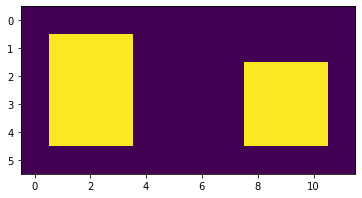

In [17]:
img = np.zeros((6,12), np.uint8)
img[1:5,1:4]=img[2:5,8:11]=1
plt.imshow(img)

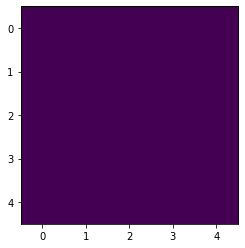

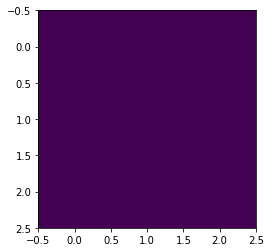

In [18]:
w = np.ones((5,5), np.uint8)
plt.imshow(w)
plt.show()
x = np.ones((3,3), np.uint8)
plt.imshow(x)

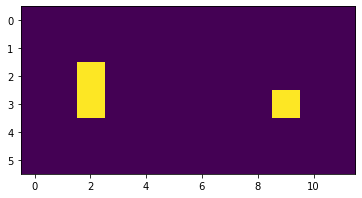

In [19]:
out1 = _erosion(img, x)
plt.imshow(out1)

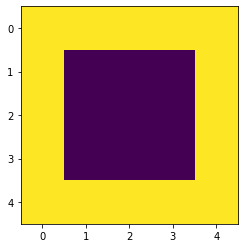

In [26]:
d = (w.shape[0]-x.shape[0])//2
xpad = cv2.copyMakeBorder(x, d,d,d,d, cv2.BORDER_CONSTANT, (0,0,0))
wminusx = w - xpad

plt.imshow(wminusx)

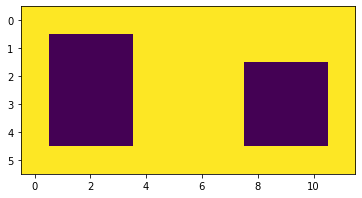

In [28]:
Ac = 1 - img
plt.imshow(Ac)

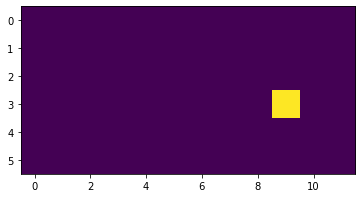

In [29]:
out2 = _erosion(Ac, wminusx)
plt.imshow(out2)

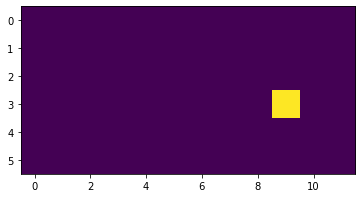

In [31]:
out3 = np.bitwise_and(out1, out2)
plt.imshow(out3)